In [1]:
import numpy as np
import matplotlib.pyplot as pyplot
from scipy.interpolate import griddata
import matplotlib.colors as colors
from functools import reduce

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures

import DataPreprocessing
import SmartPolynomials

In [2]:
combs = ['1,3','1,4','2,3','2,4','1,2,3','1,2,4','2,3,4','1,3,4','1,2,3','1,2,4','2,3,4','1,3,4']

In [3]:
me_train, mom_train_r = DataPreprocessing.npy('LO/MG_uuuxux_2/me_1000000.npy', 'LO/MG_uuuxux_2/mom_1000000.npy', combs, frac=1)
me_test, mom_test_r = DataPreprocessing.npy('LO/MG_uuuxux_2/me_100000.npy', 'LO/MG_uuuxux_2/mom_100000.npy', combs, frac=0.1)

#me_train, mom_train_r = DataPreprocessing.npy('LO/MG_uuxg_2/me_3jet_1000000.npy', 'LO/MG_uuxg_2/mom_3jet_1000000.npy', combs, frac=1)
#me_test, mom_test_r = DataPreprocessing.npy('LO/MG_uuxg_2/me_3jet_100000.npy', 'LO/MG_uuxg_2/mom_3jet_100000.npy', combs, frac=1)


In [5]:
mandel_str = ['1,3','2,3','1,4','2,4','1,2,3','1,2,4','1,3,4','2,3,4']
step = 1000

sgd_reg = SGDRegressor(eta0=2.9e-05,penalty='l1',max_iter=1000,verbose=1,alpha=0.001,power_t=0.15,tol=1e-5)

scaler = StandardScaler()
for n in range(0,len(mom_train_r),step):
    print(n)
        
    poly_train = SmartPolynomials.smartPolynomialFeatures(4, mandel_str, mom_train_r[n:n+step])
    scaler.fit(poly_train) #Rescale on training set
    poly_train = scaler.transform(poly_train)
    
    sgd_reg.fit(poly_train, me_train[n:n+step])   

0
-- Epoch 1
Norm: 0.16, NNZs: 38257, Bias: 0.028426, T: 1000, Avg. loss: 3.903018
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 0.16, NNZs: 37772, Bias: 0.049204, T: 2000, Avg. loss: 3.444428
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 0.19, NNZs: 37485, Bias: 0.067986, T: 3000, Avg. loss: 3.484443
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 0.20, NNZs: 37290, Bias: 0.085100, T: 4000, Avg. loss: 3.706106
Total training time: 1.34 seconds.
-- Epoch 5
Norm: 0.21, NNZs: 36825, Bias: 0.101640, T: 5000, Avg. loss: 3.814905
Total training time: 1.69 seconds.
-- Epoch 6
Norm: 0.20, NNZs: 36288, Bias: 0.117962, T: 6000, Avg. loss: 3.418615
Total training time: 2.04 seconds.
-- Epoch 7
Norm: 0.22, NNZs: 36132, Bias: 0.133415, T: 7000, Avg. loss: 2.755742
Total training time: 2.38 seconds.
-- Epoch 8
Norm: 0.22, NNZs: 35791, Bias: 0.148019, T: 8000, Avg. loss: 2.653614
Total training time: 2.73 seconds.
-- Epoch 9
Norm: 0.22, NNZs: 35087, Bias: 0.163137, T: 9000, Avg. loss

Norm: 0.35, NNZs: 25634, Bias: 0.745959, T: 71000, Avg. loss: 0.789076
Total training time: 25.94 seconds.
-- Epoch 72
Norm: 0.36, NNZs: 25588, Bias: 0.752681, T: 72000, Avg. loss: 0.783684
Total training time: 26.30 seconds.
-- Epoch 73
Norm: 0.36, NNZs: 25514, Bias: 0.759296, T: 73000, Avg. loss: 0.762874
Total training time: 26.67 seconds.
-- Epoch 74
Norm: 0.36, NNZs: 25468, Bias: 0.765904, T: 74000, Avg. loss: 0.767393
Total training time: 27.04 seconds.
-- Epoch 75
Norm: 0.36, NNZs: 25347, Bias: 0.772438, T: 75000, Avg. loss: 0.749628
Total training time: 27.41 seconds.
-- Epoch 76
Norm: 0.36, NNZs: 25277, Bias: 0.778922, T: 76000, Avg. loss: 0.744247
Total training time: 27.80 seconds.
-- Epoch 77
Norm: 0.36, NNZs: 25163, Bias: 0.785354, T: 77000, Avg. loss: 0.732662
Total training time: 28.17 seconds.
-- Epoch 78
Norm: 0.36, NNZs: 25047, Bias: 0.791753, T: 78000, Avg. loss: 0.727027
Total training time: 28.54 seconds.
-- Epoch 79
Norm: 0.36, NNZs: 25001, Bias: 0.798109, T: 7900

Norm: 0.42, NNZs: 21057, Bias: 1.109593, T: 140000, Avg. loss: 0.362811
Total training time: 51.37 seconds.
-- Epoch 141
Norm: 0.42, NNZs: 21030, Bias: 1.113703, T: 141000, Avg. loss: 0.357297
Total training time: 51.75 seconds.
-- Epoch 142
Norm: 0.42, NNZs: 20965, Bias: 1.117787, T: 142000, Avg. loss: 0.353959
Total training time: 52.12 seconds.
-- Epoch 143
Norm: 0.42, NNZs: 20935, Bias: 1.121852, T: 143000, Avg. loss: 0.350940
Total training time: 52.48 seconds.
-- Epoch 144
Norm: 0.42, NNZs: 20885, Bias: 1.125880, T: 144000, Avg. loss: 0.346155
Total training time: 52.86 seconds.
-- Epoch 145
Norm: 0.42, NNZs: 20842, Bias: 1.129884, T: 145000, Avg. loss: 0.342309
Total training time: 53.24 seconds.
-- Epoch 146
Norm: 0.42, NNZs: 20810, Bias: 1.133868, T: 146000, Avg. loss: 0.339911
Total training time: 53.62 seconds.
-- Epoch 147
Norm: 0.42, NNZs: 20753, Bias: 1.137828, T: 147000, Avg. loss: 0.335864
Total training time: 53.98 seconds.
-- Epoch 148
Norm: 0.43, NNZs: 20695, Bias: 1

Norm: 0.46, NNZs: 18349, Bias: 1.339319, T: 208000, Avg. loss: 0.182355
Total training time: 76.33 seconds.
-- Epoch 209
Norm: 0.46, NNZs: 18342, Bias: 1.342065, T: 209000, Avg. loss: 0.180083
Total training time: 76.68 seconds.
-- Epoch 210
Norm: 0.46, NNZs: 18282, Bias: 1.344791, T: 210000, Avg. loss: 0.177988
Total training time: 77.04 seconds.
-- Epoch 211
Norm: 0.46, NNZs: 18240, Bias: 1.347502, T: 211000, Avg. loss: 0.176458
Total training time: 77.40 seconds.
-- Epoch 212
Norm: 0.46, NNZs: 18207, Bias: 1.350201, T: 212000, Avg. loss: 0.174925
Total training time: 77.78 seconds.
-- Epoch 213
Norm: 0.46, NNZs: 18207, Bias: 1.352888, T: 213000, Avg. loss: 0.173502
Total training time: 78.14 seconds.
-- Epoch 214
Norm: 0.46, NNZs: 18147, Bias: 1.355562, T: 214000, Avg. loss: 0.171779
Total training time: 78.52 seconds.
-- Epoch 215
Norm: 0.46, NNZs: 18110, Bias: 1.358215, T: 215000, Avg. loss: 0.169813
Total training time: 78.90 seconds.
-- Epoch 216
Norm: 0.46, NNZs: 18090, Bias: 1

Norm: 0.48, NNZs: 16461, Bias: 1.495750, T: 276000, Avg. loss: 0.096098
Total training time: 101.05 seconds.
-- Epoch 277
Norm: 0.48, NNZs: 16448, Bias: 1.497653, T: 277000, Avg. loss: 0.094880
Total training time: 101.40 seconds.
-- Epoch 278
Norm: 0.48, NNZs: 16413, Bias: 1.499550, T: 278000, Avg. loss: 0.094279
Total training time: 101.78 seconds.
-- Epoch 279
Norm: 0.48, NNZs: 16403, Bias: 1.501435, T: 279000, Avg. loss: 0.093310
Total training time: 102.14 seconds.
-- Epoch 280
Norm: 0.48, NNZs: 16378, Bias: 1.503313, T: 280000, Avg. loss: 0.092681
Total training time: 102.50 seconds.
-- Epoch 281
Norm: 0.48, NNZs: 16361, Bias: 1.505179, T: 281000, Avg. loss: 0.091604
Total training time: 102.85 seconds.
-- Epoch 282
Norm: 0.48, NNZs: 16326, Bias: 1.507033, T: 282000, Avg. loss: 0.090744
Total training time: 103.20 seconds.
-- Epoch 283
Norm: 0.48, NNZs: 16315, Bias: 1.508881, T: 283000, Avg. loss: 0.090028
Total training time: 103.56 seconds.
-- Epoch 284
Norm: 0.48, NNZs: 16298,

Norm: 0.50, NNZs: 15033, Bias: 1.605532, T: 344000, Avg. loss: 0.052478
Total training time: 125.36 seconds.
-- Epoch 345
Norm: 0.50, NNZs: 15013, Bias: 1.606882, T: 345000, Avg. loss: 0.051778
Total training time: 125.71 seconds.
-- Epoch 346
Norm: 0.50, NNZs: 14988, Bias: 1.608228, T: 346000, Avg. loss: 0.051509
Total training time: 126.07 seconds.
-- Epoch 347
Norm: 0.50, NNZs: 14967, Bias: 1.609568, T: 347000, Avg. loss: 0.051087
Total training time: 126.42 seconds.
-- Epoch 348
Norm: 0.50, NNZs: 14944, Bias: 1.610901, T: 348000, Avg. loss: 0.050683
Total training time: 126.77 seconds.
-- Epoch 349
Norm: 0.50, NNZs: 14934, Bias: 1.612226, T: 349000, Avg. loss: 0.050072
Total training time: 127.13 seconds.
-- Epoch 350
Norm: 0.50, NNZs: 14907, Bias: 1.613547, T: 350000, Avg. loss: 0.049845
Total training time: 127.48 seconds.
-- Epoch 351
Norm: 0.50, NNZs: 14882, Bias: 1.614859, T: 351000, Avg. loss: 0.049261
Total training time: 127.84 seconds.
-- Epoch 352
Norm: 0.50, NNZs: 14872,

Norm: 0.51, NNZs: 13868, Bias: 1.684123, T: 412000, Avg. loss: 0.029551
Total training time: 149.45 seconds.
-- Epoch 413
Norm: 0.51, NNZs: 13849, Bias: 1.685099, T: 413000, Avg. loss: 0.029283
Total training time: 149.80 seconds.
-- Epoch 414
Norm: 0.52, NNZs: 13840, Bias: 1.686072, T: 414000, Avg. loss: 0.029131
Total training time: 150.15 seconds.
-- Epoch 415
Norm: 0.52, NNZs: 13835, Bias: 1.687040, T: 415000, Avg. loss: 0.028844
Total training time: 150.50 seconds.
-- Epoch 416
Norm: 0.52, NNZs: 13816, Bias: 1.688000, T: 416000, Avg. loss: 0.028479
Total training time: 150.86 seconds.
-- Epoch 417
Norm: 0.52, NNZs: 13804, Bias: 1.688959, T: 417000, Avg. loss: 0.028419
Total training time: 151.20 seconds.
-- Epoch 418
Norm: 0.52, NNZs: 13794, Bias: 1.689914, T: 418000, Avg. loss: 0.028171
Total training time: 151.57 seconds.
-- Epoch 419
Norm: 0.52, NNZs: 13775, Bias: 1.690863, T: 419000, Avg. loss: 0.027874
Total training time: 151.93 seconds.
-- Epoch 420
Norm: 0.52, NNZs: 13758,

Norm: 0.53, NNZs: 13026, Bias: 1.741234, T: 480000, Avg. loss: 0.017252
Total training time: 173.78 seconds.
-- Epoch 481
Norm: 0.53, NNZs: 13017, Bias: 1.741949, T: 481000, Avg. loss: 0.017103
Total training time: 174.13 seconds.
-- Epoch 482
Norm: 0.53, NNZs: 13005, Bias: 1.742661, T: 482000, Avg. loss: 0.016994
Total training time: 174.49 seconds.
-- Epoch 483
Norm: 0.53, NNZs: 12995, Bias: 1.743370, T: 483000, Avg. loss: 0.016843
Total training time: 174.86 seconds.
-- Epoch 484
Norm: 0.53, NNZs: 12980, Bias: 1.744075, T: 484000, Avg. loss: 0.016705
Total training time: 175.22 seconds.
-- Epoch 485
Norm: 0.53, NNZs: 12968, Bias: 1.744777, T: 485000, Avg. loss: 0.016578
Total training time: 175.58 seconds.
-- Epoch 486
Norm: 0.53, NNZs: 12958, Bias: 1.745475, T: 486000, Avg. loss: 0.016467
Total training time: 175.92 seconds.
-- Epoch 487
Norm: 0.53, NNZs: 12949, Bias: 1.746171, T: 487000, Avg. loss: 0.016335
Total training time: 176.27 seconds.
-- Epoch 488
Norm: 0.53, NNZs: 12940,

KeyboardInterrupt: 

In [6]:
lin_mse = 0
me_predictions = np.zeros(len(me_test))
for n in range(0,len(mom_test_r),step):
    if(n%10000==0): print(n)
    poly_test = SmartPolynomials.smartPolynomialFeatures(4, mandel_str, mom_test_r[n: n+step])
    poly_test = scaler.transform(poly_test)

    me_predict = sgd_reg.predict(poly_test) #Prediction on test set
    me_predictions[n:n+step] = me_predict
    lin_mse += np.sum(np.square(np.abs(me_test[n:n+step] - me_predict)))

print('RMSE_test: {}'.format(np.sqrt(lin_mse/len(me_test))))

print(me_predictions[:5])
print(me_test[:5])

lin_perc = np.mean(100*np.divide(np.abs(me_test - me_predictions), me_test))
print('Percentage Error: {}'.format(lin_perc))

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
RMSE_test: 2.057944684882827
[ 2.4885248  -0.62722215 -1.85282538 -1.83367227 -1.352099  ]
[3.6635314510211003 2.13084336576871 0.21374503167488815
 0.028561717048823303 0.41757623678627087]
Percentage Error: 30415.66197320923


In [35]:
print(len(me_test))

100000


In [10]:
##Training RMSE in case of overfitting.
lin_mse = 0
me_predictions = np.zeros(len(me_train))
for n in range(0,len(mom_train_r),step):
    if(n%10000==0): print(n)
    poly_train = SmartPolynomials.smartPolynomialFeatures(4, mandel_str, mom_train_r[n: n+step])
    poly_train = scaler.transform(poly_train)

    me_predict = sgd_reg.predict(poly_train) #Prediction on test set
    me_predictions[n:n+step] = me_predict
    lin_mse += np.sum(np.square(np.abs(me_train[n:n+step] - me_predict)))

print('RMSE_train: {}'.format(np.sqrt(lin_mse/len(me_train))))
#print('RMSE_train: {}'.format(np.sqrt(mean_squared_error(me_train, sgd_reg.predict(poly_train)))))
print(me_predictions[:5])
print(me_train[:5])
lin_perc = np.mean(100*np.divide(np.abs(me_train - me_predictions), me_train))
print('Percentage Error: {}'.format(lin_perc))

0
RMSE_train: 2.0853166437576807
[ 5.2915496   1.56965905  1.45010563 -0.00875969 -1.01724489]
[4.711016026426369 4.050837847601455 5.248391209065847 1.6638321044221127
 0.024690359522614384]
Percentage Error: 3158.256565915087


Error Plot

In [26]:
#s12, s13, s23 = DataPreprocessing.mandel_creation(['3,4','3,5','4,5'], mom_test)
s12, s13, s23 = DataPreprocessing.mandel_creation(['1,2','1,4','2,4'], mom_test_r)
S = s12 + s13 + s23

In [27]:
x1 = np.divide(s12, 1000000)
x2 = np.divide(s13, 1000000)
x3 = np.divide(s23, 1000000)

x2i = np.linspace(0, 1, 500) #x1 coordinates
x3i = np.linspace(0, 1, 500) #x2 coordinates
X2i, X3i = np.meshgrid(x2i, x3i) #2d regularly spaced grid of coordinates.

In [28]:
#Value at grid coordinate is mapped to the nearest actual datapoint.
grid = griddata((x2, x3), 100*np.divide(np.abs(me_test - me_predictions), me_test), (X2i, X3i), method='linear') 
#grid = griddata((x2, x3), me_train, (X2i, X3i), method='linear')

Text(0.5,0,'x3')

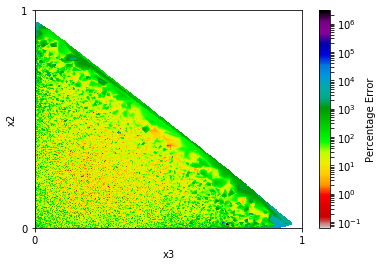

In [29]:
fig, ax = pyplot.subplots()
im = ax.pcolor(grid, cmap = 'nipy_spectral_r', norm = colors.LogNorm()) #color map of coord grid
cbar = ax.figure.colorbar(im)
cbar.set_label('Percentage Error')

ax.set_xticks([0, 500])
ax.set_xticklabels([0, 1])
ax.set_yticks([0, 500])
ax.set_yticklabels([0, 1])


ax.set_ylabel('x2')
ax.set_xlabel('x3')

Hyperparameter Training

In [26]:
mandel_str = ['1,3','2,3','1,4','2,4','1,2,3','1,2,4','1,3,4','2,3,4']
step = 1000

#Warm_start, fit, elasticnet, l1_ratio 0.8 eta0 5.61111111e-05
#warm_Start, partialfit, elasticnet, l1_ratio 0.8 eta0 7.78e-5

test_error=[] 
perc_error=[]
eta0s = np.linspace(1e-4,1e-5,5)

for eta0 in eta0s:
    sgd_reg = SGDRegressor(eta0=1e-5,penalty='elasticnet',l1_ratio=0.5,max_iter=1,alpha=0.05,verbose=1)

    scaler = StandardScaler()
    for n in range(0,len(mom_train_r),step):
        if(n%10000==0): print(n)

        poly_train = SmartPolynomials.smartPolynomialFeatures(4, mandel_str, mom_train_r[n:n+step])
        ##Rescale
        scaler.partial_fit(poly_train) #Rescale on training set
        poly_train = scaler.transform(poly_train)
        
        sgd_reg.partial_fit(poly_train, me_train[n:n+step]) 
        sgd_reg.partial_fit(poly_train, me_train[n:n+step]) 
        sgd_reg.partial_fit(poly_train, me_train[n:n+step]) 
        sgd_reg.partial_fit(poly_train, me_train[n:n+step]) 
        sgd_reg.partial_fit(poly_train, me_train[n:n+step]) 
        
    lin_mse = 0
    me_predictions = np.zeros(len(me_test))
    for m in range(0,len(mom_test_r),step):
        poly_test = SmartPolynomials.smartPolynomialFeatures(4, mandel_str, mom_test_r[m: m+step])
        poly_test = scaler.transform(poly_test)

        me_predict = sgd_reg.predict(poly_test) #Prediction on test set
        me_predictions[m:m+step] = me_predict
        lin_mse += np.sum(np.square(np.abs(me_test[m:m+step] - me_predict)))
    perc_error.append(np.mean(100*np.divide(np.abs(me_test - me_predictions), me_test)))
    test_error.append(np.sqrt(lin_mse/len(me_test)))
    print(perc_error)
    print(test_error)

0
-- Epoch 1
Norm: 1.09, NNZs: 35003, Bias: 0.065287, T: 1000, Avg. loss: 23.134924
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 1.77, NNZs: 37192, Bias: 0.112050, T: 1000, Avg. loss: 121.458828
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 2.81, NNZs: 37908, Bias: 0.150969, T: 1000, Avg. loss: 279.041226
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 4.77, NNZs: 38259, Bias: 0.184973, T: 1000, Avg. loss: 1203.736910
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 5.60, NNZs: 38377, Bias: 0.223643, T: 1000, Avg. loss: 1630.096245
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 4.79, NNZs: 38344, Bias: 0.237971, T: 1000, Avg. loss: 835.670952
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 4.55, NNZs: 38315, Bias: 0.251025, T: 1000, Avg. loss: 831.893380
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 1.01, NNZs: 30814, Bias: 0.711940, T: 1000, Avg. loss: 0.624855
Total training time: 0.38 seconds.
-- Epoch 1
Norm: 0.98, NNZs: 34613, Bias: 0.718832, T: 

-- Epoch 1
Norm: 0.37, NNZs: 19287, Bias: 1.004499, T: 1000, Avg. loss: 0.370990
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.37, NNZs: 18162, Bias: 1.007913, T: 1000, Avg. loss: 0.350171
Total training time: 0.36 seconds.
-- Epoch 1
Norm: 0.37, NNZs: 24616, Bias: 1.012249, T: 1000, Avg. loss: 0.629111
Total training time: 0.36 seconds.
-- Epoch 1
Norm: 0.36, NNZs: 22376, Bias: 1.016160, T: 1000, Avg. loss: 0.470868
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.36, NNZs: 20369, Bias: 1.019831, T: 1000, Avg. loss: 0.408306
Total training time: 0.36 seconds.
-- Epoch 1
Norm: 0.35, NNZs: 18656, Bias: 1.023307, T: 1000, Avg. loss: 0.368270
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.35, NNZs: 17145, Bias: 1.026640, T: 1000, Avg. loss: 0.340029
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.35, NNZs: 24483, Bias: 1.030544, T: 1000, Avg. loss: 0.536080
Total training time: 0.37 seconds.
-- Epoch 1
Norm: 0.34, NNZs: 22393, Bias: 1.034041, T: 1000, Avg. loss: 

-- Epoch 1
Norm: 0.24, NNZs: 13601, Bias: 1.225584, T: 1000, Avg. loss: 0.252147
Total training time: 0.34 seconds.
40000
-- Epoch 1
Norm: 0.24, NNZs: 20856, Bias: 1.228480, T: 1000, Avg. loss: 0.400789
Total training time: 0.36 seconds.
-- Epoch 1
Norm: 0.24, NNZs: 19154, Bias: 1.231158, T: 1000, Avg. loss: 0.327120
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.24, NNZs: 16907, Bias: 1.233703, T: 1000, Avg. loss: 0.292365
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.24, NNZs: 15328, Bias: 1.236144, T: 1000, Avg. loss: 0.266904
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.24, NNZs: 13964, Bias: 1.238491, T: 1000, Avg. loss: 0.250260
Total training time: 0.33 seconds.
-- Epoch 1
Norm: 0.24, NNZs: 20523, Bias: 1.241114, T: 1000, Avg. loss: 0.344994
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.24, NNZs: 18085, Bias: 1.243552, T: 1000, Avg. loss: 0.277071
Total training time: 0.36 seconds.
-- Epoch 1
Norm: 0.24, NNZs: 15768, Bias: 1.245869, T: 1000, Avg. 

-- Epoch 1
Norm: 0.23, NNZs: 16363, Bias: 1.377900, T: 1000, Avg. loss: 0.272610
Total training time: 0.36 seconds.
-- Epoch 1
Norm: 0.23, NNZs: 14454, Bias: 1.379636, T: 1000, Avg. loss: 0.234529
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.23, NNZs: 13120, Bias: 1.381329, T: 1000, Avg. loss: 0.216217
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.23, NNZs: 11701, Bias: 1.382961, T: 1000, Avg. loss: 0.202610
Total training time: 0.33 seconds.
-- Epoch 1
Norm: 0.23, NNZs: 10939, Bias: 1.384546, T: 1000, Avg. loss: 0.192914
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.23, NNZs: 18372, Bias: 1.386493, T: 1000, Avg. loss: 0.287334
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.23, NNZs: 16073, Bias: 1.388299, T: 1000, Avg. loss: 0.235856
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.23, NNZs: 14296, Bias: 1.390042, T: 1000, Avg. loss: 0.211244
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.23, NNZs: 12722, Bias: 1.391708, T: 1000, Avg. loss: 

-- Epoch 1
Norm: 0.24, NNZs: 14893, Bias: 1.487458, T: 1000, Avg. loss: 0.206492
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.24, NNZs: 13169, Bias: 1.488713, T: 1000, Avg. loss: 0.186237
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.24, NNZs: 11980, Bias: 1.489931, T: 1000, Avg. loss: 0.173188
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.24, NNZs: 10777, Bias: 1.491119, T: 1000, Avg. loss: 0.163822
Total training time: 0.33 seconds.
-- Epoch 1
Norm: 0.24, NNZs: 15296, Bias: 1.492495, T: 1000, Avg. loss: 0.216501
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.24, NNZs: 12920, Bias: 1.493814, T: 1000, Avg. loss: 0.187659
Total training time: 0.33 seconds.
-- Epoch 1
Norm: 0.24, NNZs: 11359, Bias: 1.495107, T: 1000, Avg. loss: 0.174649
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.24, NNZs: 10448, Bias: 1.496365, T: 1000, Avg. loss: 0.167837
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.24, NNZs: 9385, Bias: 1.497595, T: 1000, Avg. loss: 0

-- Epoch 1
Norm: 0.24, NNZs: 12759, Bias: 1.568136, T: 1000, Avg. loss: 0.162598
Total training time: 0.32 seconds.
-- Epoch 1
Norm: 0.24, NNZs: 11441, Bias: 1.569003, T: 1000, Avg. loss: 0.153620
Total training time: 0.33 seconds.
-- Epoch 1
Norm: 0.24, NNZs: 10451, Bias: 1.569841, T: 1000, Avg. loss: 0.147163
Total training time: 0.33 seconds.
-- Epoch 1
Norm: 0.25, NNZs: 17111, Bias: 1.570876, T: 1000, Avg. loss: 0.241196
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.25, NNZs: 14874, Bias: 1.571872, T: 1000, Avg. loss: 0.197584
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.25, NNZs: 12896, Bias: 1.572825, T: 1000, Avg. loss: 0.176264
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.25, NNZs: 11669, Bias: 1.573748, T: 1000, Avg. loss: 0.163180
Total training time: 0.33 seconds.
-- Epoch 1
Norm: 0.25, NNZs: 11033, Bias: 1.574659, T: 1000, Avg. loss: 0.156993
Total training time: 0.33 seconds.
-- Epoch 1
Norm: 0.25, NNZs: 16189, Bias: 1.575491, T: 1000, Avg. loss: 

-- Epoch 1
Norm: 0.26, NNZs: 9388, Bias: 1.627862, T: 1000, Avg. loss: 0.152367
Total training time: 0.33 seconds.
-- Epoch 1
Norm: 0.26, NNZs: 8671, Bias: 1.628586, T: 1000, Avg. loss: 0.146163
Total training time: 0.33 seconds.
-- Epoch 1
Norm: 0.26, NNZs: 15311, Bias: 1.629306, T: 1000, Avg. loss: 0.204588
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.26, NNZs: 13144, Bias: 1.630003, T: 1000, Avg. loss: 0.173493
Total training time: 0.33 seconds.
-- Epoch 1
Norm: 0.26, NNZs: 11760, Bias: 1.630674, T: 1000, Avg. loss: 0.158729
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.26, NNZs: 10707, Bias: 1.631329, T: 1000, Avg. loss: 0.148635
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.26, NNZs: 9661, Bias: 1.631955, T: 1000, Avg. loss: 0.140822
Total training time: 0.33 seconds.
-- Epoch 1
Norm: 0.26, NNZs: 14615, Bias: 1.632579, T: 1000, Avg. loss: 0.195193
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.26, NNZs: 12488, Bias: 1.633183, T: 1000, Avg. loss: 0.1

-- Epoch 1
Norm: 0.19, NNZs: 22563, Bias: 0.538026, T: 1000, Avg. loss: 0.630650
Total training time: 0.36 seconds.
-- Epoch 1
Norm: 0.19, NNZs: 28934, Bias: 0.544596, T: 1000, Avg. loss: 1.194992
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.19, NNZs: 28043, Bias: 0.550472, T: 1000, Avg. loss: 0.881019
Total training time: 0.36 seconds.
-- Epoch 1
Norm: 0.19, NNZs: 26330, Bias: 0.555944, T: 1000, Avg. loss: 0.770897
Total training time: 0.37 seconds.
-- Epoch 1
Norm: 0.19, NNZs: 24219, Bias: 0.561132, T: 1000, Avg. loss: 0.693435
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.19, NNZs: 23279, Bias: 0.566074, T: 1000, Avg. loss: 0.634917
Total training time: 0.36 seconds.
-- Epoch 1
Norm: 0.19, NNZs: 28331, Bias: 0.572212, T: 1000, Avg. loss: 1.106233
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.18, NNZs: 27341, Bias: 0.577690, T: 1000, Avg. loss: 0.838294
Total training time: 0.36 seconds.
-- Epoch 1
Norm: 0.18, NNZs: 25405, Bias: 0.582855, T: 1000, Avg. loss: 

-- Epoch 1
Norm: 0.19, NNZs: 25426, Bias: 0.856549, T: 1000, Avg. loss: 0.725437
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.19, NNZs: 23576, Bias: 0.860239, T: 1000, Avg. loss: 0.581694
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.19, NNZs: 22006, Bias: 0.863731, T: 1000, Avg. loss: 0.523516
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.19, NNZs: 20039, Bias: 0.867082, T: 1000, Avg. loss: 0.479077
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.20, NNZs: 18989, Bias: 0.870285, T: 1000, Avg. loss: 0.446974
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.20, NNZs: 25036, Bias: 0.874206, T: 1000, Avg. loss: 0.703692
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.19, NNZs: 23181, Bias: 0.877791, T: 1000, Avg. loss: 0.568761
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.19, NNZs: 21133, Bias: 0.881198, T: 1000, Avg. loss: 0.511302
Total training time: 0.36 seconds.
-- Epoch 1
Norm: 0.20, NNZs: 19396, Bias: 0.884454, T: 1000, Avg. loss: 

-- Epoch 1
Norm: 0.20, NNZs: 20977, Bias: 1.069564, T: 1000, Avg. loss: 0.416805
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.20, NNZs: 19039, Bias: 1.072049, T: 1000, Avg. loss: 0.378184
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.21, NNZs: 17479, Bias: 1.074434, T: 1000, Avg. loss: 0.351296
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.21, NNZs: 16080, Bias: 1.076747, T: 1000, Avg. loss: 0.331293
Total training time: 0.34 seconds.
40000
-- Epoch 1
Norm: 0.21, NNZs: 23054, Bias: 1.079547, T: 1000, Avg. loss: 0.502040
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.21, NNZs: 21332, Bias: 1.082128, T: 1000, Avg. loss: 0.417522
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.21, NNZs: 19432, Bias: 1.084598, T: 1000, Avg. loss: 0.378911
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.21, NNZs: 17966, Bias: 1.086973, T: 1000, Avg. loss: 0.352775
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.21, NNZs: 16566, Bias: 1.089280, T: 1000, Avg. 

-- Epoch 1
Norm: 0.22, NNZs: 16095, Bias: 1.224121, T: 1000, Avg. loss: 0.284579
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.22, NNZs: 14527, Bias: 1.225927, T: 1000, Avg. loss: 0.268372
Total training time: 0.33 seconds.
-- Epoch 1
Norm: 0.22, NNZs: 13637, Bias: 1.227690, T: 1000, Avg. loss: 0.256770
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.22, NNZs: 19010, Bias: 1.229632, T: 1000, Avg. loss: 0.344029
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.22, NNZs: 16974, Bias: 1.231474, T: 1000, Avg. loss: 0.302201
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.22, NNZs: 15486, Bias: 1.233231, T: 1000, Avg. loss: 0.279242
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.22, NNZs: 14039, Bias: 1.234955, T: 1000, Avg. loss: 0.264186
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.22, NNZs: 12947, Bias: 1.236629, T: 1000, Avg. loss: 0.251357
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.22, NNZs: 20730, Bias: 1.238629, T: 1000, Avg. loss: 

-- Epoch 1
Norm: 0.23, NNZs: 14321, Bias: 1.342142, T: 1000, Avg. loss: 0.224168
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.23, NNZs: 13113, Bias: 1.343541, T: 1000, Avg. loss: 0.213712
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.23, NNZs: 18963, Bias: 1.345038, T: 1000, Avg. loss: 0.304518
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.23, NNZs: 17213, Bias: 1.346473, T: 1000, Avg. loss: 0.262944
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.23, NNZs: 15314, Bias: 1.347862, T: 1000, Avg. loss: 0.240012
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.23, NNZs: 14086, Bias: 1.349214, T: 1000, Avg. loss: 0.225178
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.23, NNZs: 13118, Bias: 1.350535, T: 1000, Avg. loss: 0.213654
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.23, NNZs: 17969, Bias: 1.352043, T: 1000, Avg. loss: 0.275352
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.23, NNZs: 15821, Bias: 1.353492, T: 1000, Avg. loss: 

-- Epoch 1
Norm: 0.24, NNZs: 11166, Bias: 1.434133, T: 1000, Avg. loss: 0.172837
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.24, NNZs: 18816, Bias: 1.435264, T: 1000, Avg. loss: 0.259727
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.24, NNZs: 16985, Bias: 1.436355, T: 1000, Avg. loss: 0.222863
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.24, NNZs: 14987, Bias: 1.437411, T: 1000, Avg. loss: 0.202411
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.24, NNZs: 13468, Bias: 1.438444, T: 1000, Avg. loss: 0.190855
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.24, NNZs: 12720, Bias: 1.439462, T: 1000, Avg. loss: 0.182725
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.24, NNZs: 19226, Bias: 1.440649, T: 1000, Avg. loss: 0.284386
Total training time: 0.38 seconds.
-- Epoch 1
Norm: 0.24, NNZs: 17079, Bias: 1.441797, T: 1000, Avg. loss: 0.242086
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.24, NNZs: 15182, Bias: 1.442904, T: 1000, Avg. loss: 

-- Epoch 1
Norm: 0.25, NNZs: 15549, Bias: 1.505948, T: 1000, Avg. loss: 0.228855
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.25, NNZs: 13857, Bias: 1.506886, T: 1000, Avg. loss: 0.206608
Total training time: 0.33 seconds.
-- Epoch 1
Norm: 0.25, NNZs: 12157, Bias: 1.507797, T: 1000, Avg. loss: 0.192029
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.25, NNZs: 10955, Bias: 1.508691, T: 1000, Avg. loss: 0.183364
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.25, NNZs: 10066, Bias: 1.509569, T: 1000, Avg. loss: 0.176346
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.25, NNZs: 16576, Bias: 1.510483, T: 1000, Avg. loss: 0.236881
Total training time: 0.36 seconds.
-- Epoch 1
Norm: 0.25, NNZs: 14739, Bias: 1.511353, T: 1000, Avg. loss: 0.206327
Total training time: 0.33 seconds.
-- Epoch 1
Norm: 0.25, NNZs: 13255, Bias: 1.512196, T: 1000, Avg. loss: 0.189715
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.25, NNZs: 12196, Bias: 1.513018, T: 1000, Avg. loss: 

-- Epoch 1
Norm: 0.18, NNZs: 30223, Bias: 0.386485, T: 1000, Avg. loss: 1.332125
Total training time: 0.36 seconds.
-- Epoch 1
Norm: 0.18, NNZs: 29225, Bias: 0.391312, T: 1000, Avg. loss: 1.074882
Total training time: 0.37 seconds.
-- Epoch 1
Norm: 0.18, NNZs: 27623, Bias: 0.395844, T: 1000, Avg. loss: 0.951242
Total training time: 0.36 seconds.
-- Epoch 1
Norm: 0.18, NNZs: 26301, Bias: 0.400149, T: 1000, Avg. loss: 0.868455
Total training time: 0.36 seconds.
-- Epoch 1
Norm: 0.18, NNZs: 25209, Bias: 0.404245, T: 1000, Avg. loss: 0.802176
Total training time: 0.37 seconds.
-- Epoch 1
Norm: 0.18, NNZs: 30533, Bias: 0.409375, T: 1000, Avg. loss: 1.379567
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.18, NNZs: 29502, Bias: 0.414102, T: 1000, Avg. loss: 1.080196
Total training time: 0.36 seconds.
-- Epoch 1
Norm: 0.18, NNZs: 27973, Bias: 0.418526, T: 1000, Avg. loss: 0.956494
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.18, NNZs: 26508, Bias: 0.422766, T: 1000, Avg. loss: 

-- Epoch 1
Norm: 0.18, NNZs: 27498, Bias: 0.655706, T: 1000, Avg. loss: 0.823701
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.18, NNZs: 25535, Bias: 0.658884, T: 1000, Avg. loss: 0.746996
Total training time: 0.36 seconds.
-- Epoch 1
Norm: 0.18, NNZs: 24061, Bias: 0.661940, T: 1000, Avg. loss: 0.691530
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.18, NNZs: 22749, Bias: 0.664880, T: 1000, Avg. loss: 0.650049
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.18, NNZs: 28067, Bias: 0.668270, T: 1000, Avg. loss: 0.934583
Total training time: 0.36 seconds.
-- Epoch 1
Norm: 0.18, NNZs: 26948, Bias: 0.671439, T: 1000, Avg. loss: 0.786693
Total training time: 0.37 seconds.
-- Epoch 1
Norm: 0.18, NNZs: 25128, Bias: 0.674456, T: 1000, Avg. loss: 0.707253
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.18, NNZs: 23670, Bias: 0.677360, T: 1000, Avg. loss: 0.659009
Total training time: 0.36 seconds.
-- Epoch 1
Norm: 0.18, NNZs: 22341, Bias: 0.680165, T: 1000, Avg. loss: 

-- Epoch 1
Norm: 0.19, NNZs: 23084, Bias: 0.848034, T: 1000, Avg. loss: 0.543753
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.19, NNZs: 21466, Bias: 0.850272, T: 1000, Avg. loss: 0.511529
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.19, NNZs: 20107, Bias: 0.852447, T: 1000, Avg. loss: 0.483255
Total training time: 0.37 seconds.
-- Epoch 1
Norm: 0.19, NNZs: 26140, Bias: 0.854972, T: 1000, Avg. loss: 0.686402
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.19, NNZs: 24871, Bias: 0.857348, T: 1000, Avg. loss: 0.594613
Total training time: 0.36 seconds.
-- Epoch 1
Norm: 0.19, NNZs: 22991, Bias: 0.859646, T: 1000, Avg. loss: 0.545801
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.19, NNZs: 21738, Bias: 0.861861, T: 1000, Avg. loss: 0.512259
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.19, NNZs: 20317, Bias: 0.864007, T: 1000, Avg. loss: 0.483476
Total training time: 0.35 seconds.
40000
-- Epoch 1
Norm: 0.19, NNZs: 26680, Bias: 0.866553, T: 1000, Avg. 

-- Epoch 1
Norm: 0.20, NNZs: 19340, Bias: 0.996125, T: 1000, Avg. loss: 0.392579
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.20, NNZs: 18079, Bias: 0.997885, T: 1000, Avg. loss: 0.375097
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.20, NNZs: 24181, Bias: 0.999870, T: 1000, Avg. loss: 0.533327
Total training time: 0.36 seconds.
-- Epoch 1
Norm: 0.20, NNZs: 22261, Bias: 1.001759, T: 1000, Avg. loss: 0.462314
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.20, NNZs: 20398, Bias: 1.003583, T: 1000, Avg. loss: 0.429490
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.20, NNZs: 19078, Bias: 1.005360, T: 1000, Avg. loss: 0.405605
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.20, NNZs: 17731, Bias: 1.007087, T: 1000, Avg. loss: 0.384719
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.20, NNZs: 23138, Bias: 1.008992, T: 1000, Avg. loss: 0.500365
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.20, NNZs: 21485, Bias: 1.010808, T: 1000, Avg. loss: 

-- Epoch 1
Norm: 0.21, NNZs: 17034, Bias: 1.115810, T: 1000, Avg. loss: 0.372608
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.21, NNZs: 23737, Bias: 1.117436, T: 1000, Avg. loss: 0.439298
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.21, NNZs: 22110, Bias: 1.118997, T: 1000, Avg. loss: 0.388463
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.21, NNZs: 20131, Bias: 1.120501, T: 1000, Avg. loss: 0.361195
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.21, NNZs: 18406, Bias: 1.121970, T: 1000, Avg. loss: 0.340772
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.21, NNZs: 17311, Bias: 1.123414, T: 1000, Avg. loss: 0.327971
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.21, NNZs: 23164, Bias: 1.124976, T: 1000, Avg. loss: 0.435631
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.21, NNZs: 21530, Bias: 1.126473, T: 1000, Avg. loss: 0.385668
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.21, NNZs: 19765, Bias: 1.127920, T: 1000, Avg. loss: 

-- Epoch 1
Norm: 0.22, NNZs: 21379, Bias: 1.215027, T: 1000, Avg. loss: 0.339186
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.22, NNZs: 19535, Bias: 1.216258, T: 1000, Avg. loss: 0.303381
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.22, NNZs: 17585, Bias: 1.217455, T: 1000, Avg. loss: 0.285224
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.22, NNZs: 16177, Bias: 1.218627, T: 1000, Avg. loss: 0.271780
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.22, NNZs: 15125, Bias: 1.219778, T: 1000, Avg. loss: 0.261502
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.22, NNZs: 22624, Bias: 1.221049, T: 1000, Avg. loss: 0.368214
Total training time: 0.37 seconds.
-- Epoch 1
Norm: 0.22, NNZs: 20783, Bias: 1.222271, T: 1000, Avg. loss: 0.324131
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.22, NNZs: 18799, Bias: 1.223459, T: 1000, Avg. loss: 0.299966
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.22, NNZs: 17425, Bias: 1.224620, T: 1000, Avg. loss: 

-- Epoch 1
Norm: 0.23, NNZs: 18985, Bias: 1.296562, T: 1000, Avg. loss: 0.276247
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.23, NNZs: 17223, Bias: 1.297636, T: 1000, Avg. loss: 0.259072
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.23, NNZs: 15707, Bias: 1.298686, T: 1000, Avg. loss: 0.246743
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.23, NNZs: 14582, Bias: 1.299718, T: 1000, Avg. loss: 0.236967
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.23, NNZs: 19782, Bias: 1.300839, T: 1000, Avg. loss: 0.320423
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.23, NNZs: 17638, Bias: 1.301916, T: 1000, Avg. loss: 0.292475
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.23, NNZs: 16003, Bias: 1.302967, T: 1000, Avg. loss: 0.276380
Total training time: 0.34 seconds.
-- Epoch 1
Norm: 0.23, NNZs: 14698, Bias: 1.303997, T: 1000, Avg. loss: 0.264596
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.23, NNZs: 13755, Bias: 1.305008, T: 1000, Avg. loss: 

-- Epoch 1
Norm: 0.15, NNZs: 31676, Bias: 0.231165, T: 1000, Avg. loss: 1.400954
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.15, NNZs: 30581, Bias: 0.234359, T: 1000, Avg. loss: 1.276966
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.16, NNZs: 29559, Bias: 0.237435, T: 1000, Avg. loss: 1.188907
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.16, NNZs: 28442, Bias: 0.240398, T: 1000, Avg. loss: 1.119239
Total training time: 0.36 seconds.
10000
-- Epoch 1
Norm: 0.16, NNZs: 32191, Bias: 0.243815, T: 1000, Avg. loss: 1.517764
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.15, NNZs: 31465, Bias: 0.247024, T: 1000, Avg. loss: 1.320988
Total training time: 0.35 seconds.
-- Epoch 1
Norm: 0.15, NNZs: 30347, Bias: 0.250091, T: 1000, Avg. loss: 1.208881
Total training time: 0.38 seconds.
-- Epoch 1
Norm: 0.16, NNZs: 29309, Bias: 0.253038, T: 1000, Avg. loss: 1.129137
Total training time: 0.38 seconds.
-- Epoch 1
Norm: 0.16, NNZs: 28303, Bias: 0.255885, T: 1000, Avg. 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



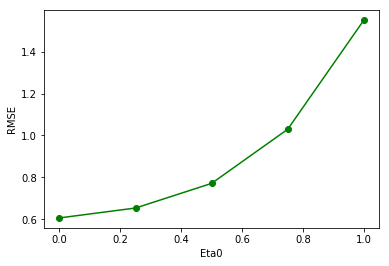

In [27]:
pyplot.figure()

pyplot.xlabel("Eta0")
pyplot.ylabel("RMSE")
pyplot.plot(l1_ratios, test_error, 'o-', color="g",
             label="Cross-validation score")

In [28]:
print(test_error)

[0.6069896778924678, 0.6541253649013847, 0.7715794601702427, 1.0295296187207175, 1.5491871147791323]


In [29]:
print(eta0s)

[1.00e-04 7.75e-05 5.50e-05 3.25e-05 1.00e-05]


Learning Curve

In [ ]:
mandel_str = ['1,3','2,3','1,4','2,4','1,2,3','1,2,4','1,3,4','2,3,4']
step = 1000
sgd_reg = SGDRegressor(eta0=4e-6,penalty='l1',max_iter=1,verbose=1,alpha=0.0001,power_t=0.05,warm_start=True)


training_error = []
test_error = []
test_perc = []
coefficient = []

scaler = StandardScaler()
for n in range(0,len(mom_train_r),step):
    poly_train = SmartPolynomials.smarterPolynomialFeatures(4,mom_train_r[n:n+step])
    ##Rescale
    scaler.partial_fit(poly_train) #Rescale on training set
    poly_train = scaler.transform(poly_train)
    
    #if n == 0:
    #    sgd_reg.fit(poly_train, me_train[n:n+step], coef_init=np.loadtxt('PolyFitCoef'), intercept_init=1.81960817)     
    #else : 
    sgd_reg.fit(poly_train, me_train[n:n+step])
    coefficient.append(sgd_reg.coef_[10])
        
    if(n%30000==0): 
        print(n)
    
        ##Testing Error
        lin_mse = 0
        lin_perc = 0
        me_predictions = np.zeros(len(me_test))
        for m in range(0,len(mom_test_r),step):
            poly_test = SmartPolynomials.smarterPolynomialFeatures(4,mom_test_r[m: m+step])
            #poly_test = poly_features.transform(np.array([np.ndarray.flatten(np.array(element)) for element in mom_test_r[m:m+step]]))
            poly_test = scaler.transform(poly_test)

            me_predict = sgd_reg.predict(poly_test) #Prediction on test set
            me_predictions[m:m+step] = me_predict
            lin_mse += np.sum(mean_squared_error(me_test[m:m+step], me_predict))
            lin_perc += np.sum(100*np.divide(np.abs(me_test[m:m+step] - me_predict), me_test[m:m+step]))
        test_error.append(np.sqrt(lin_mse*step/len(me_test)))
        test_perc.append(lin_perc/len(me_test))
        
        u = (1-sgd_reg.score(poly_train, me_train[n:n+step]))*np.std(me_train[n:n+step])**2
        training_error.append(np.sqrt(u))
        
        print(test_perc)
        print(training_error)
        print(test_error)

-- Epoch 1
Norm: 1106296469612815.25, NNZs: 43757, Bias: 2980045888877016.000000, T: 1000, Avg. loss: 3401353450382137770391241740048617854766474621322788072593155610460283586278324352622923586536315143168458752.000000
Total training time: 0.34 seconds.
0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[100.0]
[2.6081999349674626e+54]
[2.5494607257607265e+54]
-- Epoch 1
Norm: 12727203629304350.00, NNZs: 43757, Bias: 5960091777754035.000000, T: 1000, Avg. loss: 2966892892299544613736807556617178952200889798263822207351943092255934160791601577726067325996118087573700608.000000
Total training time: 0.34 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 20884954741059932.00, NNZs: 43757, Bias: 8940137666631044.000000, T: 1000, Avg. loss: 2974748869135461700333862635696581571801272034106961989611155476438984856389127496846509079906663818325917696.000000
Total training time: 0.33 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 23890383840411360.00, NNZs: 43757, Bias: 11920183555508068.000000, T: 1000, Avg. loss: 3271237676671336646096556158955819607796144780037826080938063816624875723572337238790956525905935259507097600.000000
Total training time: 0.34 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 32175221911842684.00, NNZs: 43757, Bias: 14900229444385096.000000, T: 1000, Avg. loss: 2975893225041187837259363883428248667578743109187112194212665454219324393776861744030562815336239550640947200.000000
Total training time: 0.32 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 36693189365348416.00, NNZs: 43757, Bias: 17880275333262124.000000, T: 1000, Avg. loss: 3152951900162798130527703368203615786628147083587782040007673695648884677935338845241134480932188733229236224.000000
Total training time: 0.32 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 44686249596081496.00, NNZs: 43757, Bias: 20860321222139140.000000, T: 1000, Avg. loss: 3167516826938332341008462239489123553014904725304082236158170283194712489650595178839985324513178085031411712.000000
Total training time: 0.32 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 54525770273728200.00, NNZs: 43757, Bias: 23840367111016168.000000, T: 1000, Avg. loss: 3123302017184724735353255369337539934065367442869667381200016421589636618858404918518421439227216792842665984.000000
Total training time: 0.33 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 59783189008140448.00, NNZs: 43757, Bias: 26820412999893196.000000, T: 1000, Avg. loss: 3320086565153283833632882707095383760455581566865331213595223400077420665690273481162091032600101432990892032.000000
Total training time: 0.31 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 64048291672539240.00, NNZs: 43757, Bias: 29800458888770224.000000, T: 1000, Avg. loss: 3270913629924051959252874515284801863925765260616905493081707140216869602889866680920159771300112799394430976.000000
Total training time: 0.31 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 57636276725217528.00, NNZs: 43757, Bias: 32780504777647252.000000, T: 1000, Avg. loss: 2898347575777462205354505196602543150268053327688077792294721263554717381737194711748393197497516797359816704.000000
Total training time: 0.33 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 65576002965375440.00, NNZs: 43757, Bias: 35760550666524280.000000, T: 1000, Avg. loss: 3410657074811966201854444603394174695213366038911537555974399889955112367643212443937423023849417496126816256.000000
Total training time: 0.32 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 67392845904549656.00, NNZs: 43757, Bias: 38740596555401344.000000, T: 1000, Avg. loss: 3168508256753419282935023783620015567745983214433348502647901249929085249556408630706187055178658022923698176.000000
Total training time: 0.33 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 70475846243304808.00, NNZs: 43757, Bias: 41720642444278376.000000, T: 1000, Avg. loss: 2957485782939578892702066077637415176831789442075920690404423376939199600974922067788750791705500642839625728.000000
Total training time: 0.32 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 73439745854143152.00, NNZs: 43757, Bias: 44700688333155408.000000, T: 1000, Avg. loss: 3441458699885928947914522066130979830949053547006322685089239494615066400670278019529088545526465304480186368.000000
Total training time: 0.33 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 78771966417236272.00, NNZs: 43757, Bias: 47680734222032440.000000, T: 1000, Avg. loss: 3642071971915825885721811165382807516041256103280678730303377203310185437992748335341140332405128868074094592.000000
Total training time: 0.32 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 82633134391033920.00, NNZs: 43757, Bias: 50660780110909472.000000, T: 1000, Avg. loss: 3071817951145132786684036622258560389192045130631709139620495040729541628523887281499489348526612146280202240.000000
Total training time: 0.31 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 83503186887367872.00, NNZs: 43757, Bias: 53640825999786504.000000, T: 1000, Avg. loss: 2761798886260201056744395963476013265878078591364063216079622545518476676385724093757697881186607384510857216.000000
Total training time: 0.33 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 82959306107677472.00, NNZs: 43757, Bias: 56620871888663536.000000, T: 1000, Avg. loss: 3094357088968054294287932087683055543367435136202890137294147632457296650412823031010652346834201433205637120.000000
Total training time: 0.35 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 87692227994494640.00, NNZs: 43757, Bias: 59600917777540568.000000, T: 1000, Avg. loss: 3248894708145347503008438171424893661033825224600778872262852807127850871621459949534660428619637859121364992.000000
Total training time: 0.34 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 84870678575831136.00, NNZs: 43757, Bias: 62580963666417600.000000, T: 1000, Avg. loss: 3227183014122414881541903882027966310372595346831643754834452117135599601486221129537097810738080346452000768.000000
Total training time: 0.35 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 90194426479646672.00, NNZs: 43757, Bias: 65561009555294632.000000, T: 1000, Avg. loss: 3330118479885882609404146755267545630891284930692857722240319356407705367953472589433715711481540764810346496.000000
Total training time: 0.34 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 83077866994486416.00, NNZs: 43757, Bias: 68541055444171664.000000, T: 1000, Avg. loss: 3219466575794819346260208266945961342105447466047771223042038977395643347203613826437647619578511697800855552.000000
Total training time: 0.33 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 84902744070427264.00, NNZs: 43757, Bias: 71521101333048696.000000, T: 1000, Avg. loss: 3040337435349466636224528246582689258203776878710522839575163762300023513144155154796979116045348656417603584.000000
Total training time: 0.34 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 94116265527267136.00, NNZs: 43757, Bias: 74501147221925616.000000, T: 1000, Avg. loss: 3243763473619272938805487962772302198232585330269625183602384525139419020687819671922215787837902677574942720.000000
Total training time: 0.32 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 99431629992700112.00, NNZs: 43757, Bias: 77481193110802464.000000, T: 1000, Avg. loss: 3232710385909005177119073067677728743056494899654454918674457168896654560253021783758304359984320305705254912.000000
Total training time: 0.32 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 94554498033445136.00, NNZs: 43757, Bias: 80461238999679312.000000, T: 1000, Avg. loss: 3087305578581386009878224231857390021992054171704278248111510875771103002757819378625701954556675032914853888.000000
Total training time: 0.33 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 100618374324530704.00, NNZs: 43757, Bias: 83441284888556160.000000, T: 1000, Avg. loss: 3175762956998827872462090661279916118043882495042962505910078003656486449590180022934838912757218533691097088.000000
Total training time: 0.34 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 105979443599567120.00, NNZs: 43757, Bias: 86421330777433008.000000, T: 1000, Avg. loss: 3170347950301501336895505263119715904922405933181104384401969635965866012052354746974875425664414140833202176.000000
Total training time: 0.34 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 114903088152629184.00, NNZs: 43757, Bias: 89401376666309856.000000, T: 1000, Avg. loss: 3320840740960623273204227802205321614605023463150607484670107368101248125942978823330955567048790067747225600.000000
Total training time: 0.33 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 112480119294459024.00, NNZs: 43757, Bias: 92381422555186704.000000, T: 1000, Avg. loss: 3074937538493896083455281030794228768301357696860359120387193927565840648434255740456703727919546116316594176.000000
Total training time: 0.33 seconds.
30000


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[100.0, 100.0]
[2.6081999349674626e+54, 2.4798941664893266e+54]
[2.5494607257607265e+54, 2.5494607257607265e+54]
-- Epoch 1
Norm: 114505614209615744.00, NNZs: 43757, Bias: 95361468444063552.000000, T: 1000, Avg. loss: 3294609808210931241254302971877115288063702173816817404827993877670668262189736212973399173930850232798543872.000000
Total training time: 0.35 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 110466953642846576.00, NNZs: 43757, Bias: 98341514332940400.000000, T: 1000, Avg. loss: 3075719744123872598195355344175243171448766129106485622381416966514442913976878569613431616483814363791097856.000000
Total training time: 0.35 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 106038440709712448.00, NNZs: 43757, Bias: 101321560221817248.000000, T: 1000, Avg. loss: 3236149516554599189961369044956222815319945042826923903980283765129971451410503041945418723379613676007849984.000000
Total training time: 0.34 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 107130407398262752.00, NNZs: 43757, Bias: 104301606110694096.000000, T: 1000, Avg. loss: 3156224087290075851447101517841149991851886951169621166466923225837940588029664686174019460863970186325131264.000000
Total training time: 0.34 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 105424907887953216.00, NNZs: 43757, Bias: 107281651999570944.000000, T: 1000, Avg. loss: 3361021467463930525024353089244585701508127523277401679492654906245760269234185349398414986237657627681095680.000000
Total training time: 0.34 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 107337621092014272.00, NNZs: 43757, Bias: 110261697888447792.000000, T: 1000, Avg. loss: 3269163369474219888070409945494220658539797245129147422417248481785142765320518092200382330492784968369963008.000000
Total training time: 0.34 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 102377932102791712.00, NNZs: 43757, Bias: 113241743777324640.000000, T: 1000, Avg. loss: 3192016114266120578919022103349811387979164883153535494082263608755353209391521716793865198922468765651173376.000000
Total training time: 0.35 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 97931126921966784.00, NNZs: 43757, Bias: 116221789666201488.000000, T: 1000, Avg. loss: 3126992875673710349609452881736674264289750299312945926321343617951161209626226209255712631006760475899723776.000000
Total training time: 0.36 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 105811156307061376.00, NNZs: 43757, Bias: 119201835555078336.000000, T: 1000, Avg. loss: 2871749641678720532942425109207412736600786265887463010768798731493454665093389730853104331088533465933545472.000000
Total training time: 0.36 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 109280055045000016.00, NNZs: 43757, Bias: 122181881443955184.000000, T: 1000, Avg. loss: 3263119598637119126343322062080136665716651664710952627475007706666220847580146220037442829046596995358130176.000000
Total training time: 0.35 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 113807610275202016.00, NNZs: 43757, Bias: 125161927332832032.000000, T: 1000, Avg. loss: 3044864651698644923356863447258938544444120748260609221021122889247816239389991671028647533757373628389785600.000000
Total training time: 0.35 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 110077923634071152.00, NNZs: 43757, Bias: 128141973221708880.000000, T: 1000, Avg. loss: 3576331882469100684744441146641986924855427546010397941663006647897560979174409593013285352023112070117457920.000000
Total training time: 0.36 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 108045421686215184.00, NNZs: 43757, Bias: 131122019110585728.000000, T: 1000, Avg. loss: 3162124839580107646423328732704051174440837478607485649362249501816130556876276915239075227441950531971448832.000000
Total training time: 0.36 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 110879898095772848.00, NNZs: 43757, Bias: 134102064999462576.000000, T: 1000, Avg. loss: 3114238375627227342453120250962053937813501355707522413679333615343244965885932442816837177794638543845326848.000000
Total training time: 0.37 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 111093835214032304.00, NNZs: 43757, Bias: 137082110888339424.000000, T: 1000, Avg. loss: 3173933203749946326901174210631517632391395111915796355329074052177787603244932470084415184495014188070993920.000000
Total training time: 0.38 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 107625363928638672.00, NNZs: 43757, Bias: 140062156777216272.000000, T: 1000, Avg. loss: 2933373545040557504539740852104869228418537858117672940033084954788332309965273692615090425678219306566942720.000000
Total training time: 0.37 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 111307979306544400.00, NNZs: 43757, Bias: 143042202666093120.000000, T: 1000, Avg. loss: 3162389262892040297548515676700200733165274778132762342477298309451113340944649044188755745133190612074364928.000000
Total training time: 0.38 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 117422209771670288.00, NNZs: 43757, Bias: 146022248554969984.000000, T: 1000, Avg. loss: 3108627002674183225727883826458045117633468497895200111100484639529848629645211368080895161235834085174149120.000000
Total training time: 0.37 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 121374269296992128.00, NNZs: 43757, Bias: 149002294443846688.000000, T: 1000, Avg. loss: 3186717400837576762771680249946125480110070536011918831393694705124832912545333177454807810780220359075430400.000000
Total training time: 0.36 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 124716929088029024.00, NNZs: 43757, Bias: 151982340332723392.000000, T: 1000, Avg. loss: 3218566574167401505761282606107641486129236749811009772761883885893637092628723773961373769845376815755952128.000000
Total training time: 0.36 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 128189137588515392.00, NNZs: 43757, Bias: 154962386221600096.000000, T: 1000, Avg. loss: 2969348077792470775835450824139554432703447172037004501010272703858398882557457772361289264500712686766522368.000000
Total training time: 0.36 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 133265374106400064.00, NNZs: 43757, Bias: 157942432110476800.000000, T: 1000, Avg. loss: 2893503093178638059949011345455045157634649976386404286687832049500886568512862909655852070821518602915545088.000000
Total training time: 0.37 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 129884213796494000.00, NNZs: 43757, Bias: 160922477999353504.000000, T: 1000, Avg. loss: 3297368187429648299692521230925584976545090268419931297049361373450880666156067291753569068826376733162733568.000000
Total training time: 0.36 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 130467741751416688.00, NNZs: 43757, Bias: 163902523888230208.000000, T: 1000, Avg. loss: 3428163920174298415522063606280257927952780613326628264104524791554559881110573926008501623047381965334380544.000000
Total training time: 0.35 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 1
Norm: 133991372990969392.00, NNZs: 43757, Bias: 166882569777106912.000000, T: 1000, Avg. loss: 3121649561279259081319487047505019976134019340989036911110980184871043990243450953309005399072083910460440576.000000
Total training time: 0.37 seconds.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


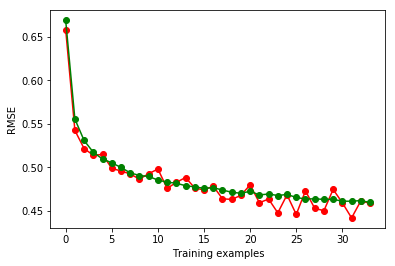

In [15]:
pyplot.figure()

pyplot.xlabel("Training examples")
pyplot.ylabel("RMSE")
pyplot.plot( training_error, 'o-', color="r",
             label="Training score")
pyplot.plot( test_error, 'o-', color="g",
             label="Cross-validation score")

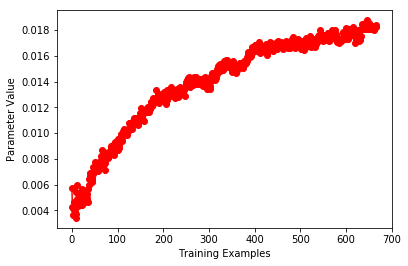

In [8]:
pyplot.figure()

pyplot.xlabel("Training Examples")
pyplot.ylabel("Parameter Value")
pyplot.plot(coefficient, 'o-', color="r",
             label="Training score")


In [ ]:
print(np.std(me_train))

In [11]:
np.savetxt('PolyFitCoef',sgd_reg.coef_)

In [12]:
print(sgd_reg.intercept_)

[1.81960817]
